# Multivariate Linear Regression


## Importing packages

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import statsmodels.api as sm
%matplotlib inline

## Reading the data

In [38]:
df = pd.read_csv('/content/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#Plotting Emission Values

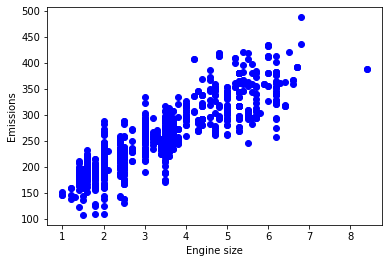

In [39]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emissions")
plt.show()

## Extracting variables

In [40]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
msk = np.random.rand(len(df)) < 0.6
train = cdf[msk]
test = cdf[~msk]

cdf_1 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
msk_1 = np.random.rand(len(df)) < 0.6
train_1 = cdf_1[msk]
test_1 = cdf_1[~msk]

## Training the ML model

In [41]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr_1 = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients value for 5 features: ', regr.coef_)

x_1 = np.asanyarray(train_1[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])
y_1 = np.asanyarray(train_1[['CO2EMISSIONS']])
regr_1.fit (x_1, y_1)
print ('Coefficients value for 6 features: ', regr_1.coef_)

Coefficients value for 5 features:  [[11.62390806  7.12151493 -0.98396991  1.05230304  9.66024396]]
Coefficients value for 6 features:  [[  8.91269585   7.60547788 -12.4947342   -2.43157259  18.76159777
   -3.97831014]]


## Prediction 

In [42]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares for 5 features: %.2f"% np.mean((y_hat - y) ** 2))
print('Variance score for 5 features: %.2f' % regr.score(x, y))
print()
y_hat_1= regr_1.predict(test_1[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])
x_1 = np.asanyarray(test_1[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])
y_1 = np.asanyarray(test_1[['CO2EMISSIONS']])
print("Residual sum of squares for 6 features: %.2f"% np.mean((y_hat_1 - y_1) ** 2))
print('Variance score for 6 features: %.2f' % regr_1.score(x_1, y_1))

Residual sum of squares for 5 features: 550.21
Variance score for 5 features: 0.87

Residual sum of squares for 6 features: 435.56
Variance score for 6 features: 0.90


In [43]:
a = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
b = df['CO2EMISSIONS']
model = sm.OLS(b, a)
print()
a_1 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
b_1 = df['CO2EMISSIONS']
model_1 = sm.OLS(b_1, a_1)

In [44]:
result = model.fit()
print(result.params)
print('---------------------------')
result_1 = model_1.fit()
print(result_1.params)

ENGINESIZE              -6.786437
CYLINDERS               21.921299
FUELCONSUMPTION_CITY   -15.819296
FUELCONSUMPTION_HWY     -5.624455
FUELCONSUMPTION_COMB    35.615402
dtype: float64
---------------------------
ENGINESIZE                   7.625529
CYLINDERS                   10.336661
FUELCONSUMPTION_CITY        -7.648370
FUELCONSUMPTION_HWY         -7.912394
FUELCONSUMPTION_COMB        27.519764
FUELCONSUMPTION_COMB_MPG     1.062279
dtype: float64


In [45]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:           CO2EMISSIONS   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          1.955e+04
Date:                Sat, 07 Aug 2021   Prob (F-statistic):                        0.00
Time:                        13:58:29   Log-Likelihood:                         -5045.0
No. Observations:                1067   AIC:                                  1.010e+04
Df Residuals:                    1062   BIC:                                  1.012e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [46]:
print(result_1.summary())

                                 OLS Regression Results                                
Dep. Variable:           CO2EMISSIONS   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.976e+04
Date:                Sat, 07 Aug 2021   Prob (F-statistic):                        0.00
Time:                        13:58:29   Log-Likelihood:                         -4942.5
No. Observations:                1067   AIC:                                      9897.
Df Residuals:                    1061   BIC:                                      9927.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------